In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist 
(x_train, y_train),(x_test, y_test) = mnist.load_data()  



Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


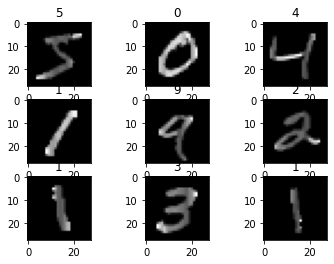

In [15]:
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.title(y_train[i])
pyplot.show()

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)  
x_test = tf.keras.utils.normalize(x_test, axis=1) 
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [5]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


In [6]:
model = tf.keras.models.Sequential()  
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())  
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])  

model.fit(x_train, y_train, epochs=3) 
val_loss, val_acc = model.evaluate(x_test, y_test)  
print(val_loss)
print(val_acc)  

Epoch 1/3
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1402 - accuracy: 0.9569
Epoch 2/3
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0501 - accuracy: 0.9837
Epoch 3/3
313/313 [==============================] - 4s 13ms/step - loss: 0.0484 - accuracy: 0.9838
0.04835612326860428
0.9837999939918518


In [7]:
model.save('mnsit.model')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnsit.model\assets


In [8]:
new_model = tf.keras.models.load_model('mnsit.model')


In [9]:
predictions = new_model.predict(x_test)


7


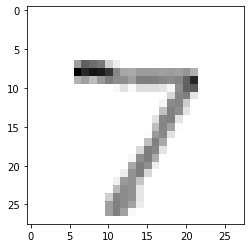

In [10]:
import numpy as np

print(np.argmax(predictions[0]))
import matplotlib.pyplot as plt
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [11]:
def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img

In [12]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_image("one.png")

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [13]:
digit = new_model.predict_classes(img)
digit

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1], dtype=int64)

In [14]:
digit[0]

1